In [3]:
import pandas as pd
import tensorflow as tf
import numpy as np
import autokeras as ak

In [68]:
data = pd.read_csv('Fifa20 Players Dataset - Fifa20 Players Dataset.csv')
df = pd.DataFrame(data)
df.head(10)

,Name,Image,Country,Position,Age,Overall,Potential,Club,ID,Height,...,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits
0,Lionel Messi,https://cdn.sofifa.org/players/4/20/158023.png,Argentina,"RW,CF,ST",32,94,94,FC Barcelona,158023,"5'7""",...,Medium,Low,5,87,92,92,96,39,66,585
1,C. Ronaldo dos Santos Aveiro,https://cdn.sofifa.org/players/4/20/20801.png,Portugal,"ST,LW",34,93,93,Juventus,20801,"6'2""",...,High,Low,5,90,93,82,89,35,78,448
2,Neymar da Silva Santos Jr.,https://cdn.sofifa.org/players/4/20/190871.png,Brazil,"LW,CAM",27,92,92,Paris Saint-Germain,190871,"5'9""",...,High,Medium,5,91,85,87,95,32,58,432
3,Jan Oblak,https://cdn.sofifa.org/players/4/20/200389.png,Slovenia,GK,26,91,91,Atlético Madrid,200389,"6'2""",...,Medium,Medium,3,87,92,78,89,52,90,240
4,Kevin De Bruyne,https://cdn.sofifa.org/players/4/20/192985.png,Belgium,"CAM,CM",28,91,91,Manchester City,192985,"5'11""",...,High,High,4,76,86,92,86,61,78,298
5,Eden Hazard,https://cdn.sofifa.org/players/4/20/183277.png,Belgium,"LW,CF",28,91,91,Real Madrid,183277,"5'9""",...,High,Medium,4,91,83,86,94,35,66,403
6,Mohamed Salah,https://cdn.sofifa.org/players/4/20/209331.png,Egypt,"RW,ST",27,90,90,Liverpool,209331,"5'9""",...,High,Medium,3,93,86,81,89,45,74,377
7,Virgil van Dijk,https://cdn.sofifa.org/players/4/20/203376.png,Netherlands,CB,27,90,90,Liverpool,203376,"6'4""",...,Medium,Medium,3,77,60,70,71,90,86,425
8,Marc-André ter Stegen,https://cdn.sofifa.org/players/4/20/192448.png,Germany,GK,27,90,90,FC Barcelona,192448,"6'2""",...,Medium,Medium,3,88,85,88,90,45,88,266
9,Luka Modrić,https://cdn.sofifa.org/players/4/20/177003.png,Croatia,CM,33,90,90,Real Madrid,177003,"5'8""",...,High,High,4,74,76,89,89,72,66,218


In [5]:
df.columns

Index(['Name', 'Image', 'Country', 'Position', 'Age', 'Overall', 'Potential',
       'Club', 'ID', 'Height', 'Weight', 'Foot', 'BOV', 'BP', 'Growth',
       'Joined', 'Loan Date End', 'Value', 'Wage', 'Release_Clause',
       'Attacking', 'Crossing', 'Finishing', 'Heading_Accuracy',
       'Short Passing', 'Volleys', 'Skill', 'Dribbling', 'Curve',
       'FK_Accuracy', 'Long Passing', 'Ball Control', 'Movement',
       'Acceleration', 'Sprint Speed', 'Agility', 'Reactions', 'Balance',
       'Power', 'Shot Power', 'Jumping', 'Stamina', 'Strength', 'Long Shots',
       'Mentality', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Composure', 'Defending', 'Marking', 'Standing Tackle',
       'Sliding Tackle', 'Goalkeeping', 'GK Diving', 'GK Handling',
       'GK Kicking', 'GK Positioning', 'GK Reflexes', 'Total Stats',
       'Base Stats', 'W/F', 'SM', 'A/W', 'D/W', 'IR', 'PAC', 'SHO', 'PAS',
       'DRI', 'DEF', 'PHY', 'Hits'],
      dtype='object')

In [6]:
df['Overall'].value_counts()

65    1184
64    1157
66    1154
67    1105
68    1054
69     988
63     974
70     918
62     866
72     766
71     751
61     681
73     603
74     543
75     512
76     364
77     272
78     233
79     195
80     152
60     113
82      91
81      85
83      82
84      48
85      35
86      18
88      17
87      15
89      13
90       4
91       3
94       1
92       1
93       1
Name: Overall, dtype: int64

In [7]:
df['First_Position'] = ''
try :
    name = df['Position'].str.split(",")
    df['First_Position']= name.str.get(0)
except:
    df['First_Postion'] = df['Position']


In [8]:
df['First_Position'].value_counts()

CB     2715
ST     2095
CM     1724
GK     1473
CDM    1239
RB     1125
LB     1074
CAM     956
LM      899
RM      864
LW      305
RW      300
CF       95
LWB      74
RWB      61
Name: First_Position, dtype: int64

In [9]:
def position(df):
    if df =='GK':
        return 0
    if df =='CB' or df =='RB' or df =='LB'or df =='LWB' or df =='RWB':
        return 1
    if df =='CDM' or df =='CM' or df =='LM'or df =='RM' or df =='CAM':
        return 2
    if df =='ST' or df =='LW' or df =='RW'or df =='CF':
        return 3

df['First_Position_count'] = 0

df['First_Position_count'] = df['First_Position'].apply(position)
df['First_Position_count'].head()

0    3
1    3
2    3
3    0
4    2
Name: First_Position_count, dtype: int64

In [10]:
df['First_Position_count'].describe()

count    14999.000000
mean         1.653310
std          0.891994
min          0.000000
25%          1.000000
50%          2.000000
75%          2.000000
max          3.000000
Name: First_Position_count, dtype: float64

In [11]:
dfg = df.loc[df['Overall']>50,['Crossing', 'Finishing', 'Heading_Accuracy',
       'Short Passing', 'Volleys', 'Dribbling', 'Curve',
       'FK_Accuracy', 'Long Passing', 'Ball Control',
       'Acceleration', 'Sprint Speed', 'Agility', 'Reactions', 'Balance',
        'Shot Power', 'Jumping', 'Stamina', 'Strength', 'Long Shots',
        'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Composure', 'Marking', 'Standing Tackle',
       'Sliding Tackle', 'GK Diving', 'GK Handling',
       'GK Kicking', 'GK Positioning', 'GK Reflexes']]

# dfg는 모든 선수를 포함한다.

# 이상치를 제거하기 위해, 각 종류별 스탯의 총합(예 - 피지컬, 공격능력, 수비능력, 오버롤)을 나타내는 수치는 제외하였다.


dfg.head() # 34 column

,Crossing,Finishing,Heading_Accuracy,Short Passing,Volleys,Dribbling,Curve,FK_Accuracy,Long Passing,Ball Control,...,Penalties,Composure,Marking,Standing Tackle,Sliding Tackle,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes
0,88,95,70,92,88,97,93,94,92,96,...,75,96,33,37,26,6,11,15,14,8
1,84,94,89,83,87,89,81,76,77,92,...,85,95,28,32,24,7,11,15,14,11
2,87,87,62,87,87,96,88,87,81,95,...,90,94,27,26,29,9,9,15,15,11
3,13,11,15,43,13,12,13,14,40,30,...,11,68,27,12,18,87,92,78,90,89
4,93,82,55,92,82,86,85,83,91,91,...,79,91,68,58,51,15,13,5,10,13


In [12]:
dfg.iloc[10000,:].mean()

# 10000 번째 선수의 스탯 평균이다.

47.8235294117647

In [152]:
## 정확도를 높이기 위한 핵심은, 스탯간의 차이를 어떻게 좁히느냐에 있다.
## 예를 들어 메시의 수비 스탯이 특정 수비수보다 좋을 수 있다 - 이를 어떻게 극복하느냐가 중요하다.
## 결국 스탯을 하나의 flow로 만드는 것이 필요해 보인다 
## 데이터의 절대성을 없애고, 상대성을 높이기 위해 
## 한 선수 안에서의 데이터만을 기준으로 standard scailing 한다.
## 결과적으로 데이터는 일종의 flow를 가지게 될 것이다.
## 예 - 메시와 하부리그 공격수는 모두 비교적 수비스탯보다 공격스탯이 상대적으로 좋을 것이다.
## 예 - 테어슈테겐과 하부리그 골키퍼는 모두 공격스탯보다 골키퍼 스탯이 상대적으로 높을 것이다


In [ ]:
for v in range(0,14999):  
    mean = dfg.iloc[v,:].mean()
    std = dfg.iloc[v,:].std()
    for i in range(0,34):
        dfg.iloc[v,i] = (dfg.iloc[v,i] - mean)/std

# stardard scailing(평균이 0, 표준편차가 1)을 실행한다.

In [13]:
pp = pd.read_excel('min_max_이상치없앰.xlsx', encoding='uft-8-sig')
pp.head()
# 시간이 많이 걸리기 때문에 미리 전처리해둔 데이터를 업로드하였다.

,Unnamed: 0,Crossing,Finishing,Heading_Accuracy,Short Passing,Volleys,Dribbling,Curve,FK_Accuracy,Long Passing,...,Penalties,Composure,Marking,Standing Tackle,Sliding Tackle,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes
0,0,0.594203,0.814827,0.026883,0.720274,0.594203,0.877862,0.751791,0.783309,0.720274,...,0.184472,0.846345,-1.139275,-1.013203,-1.359899,-1.990254,-1.832665,-1.706594,-1.738112,-1.927219
1,1,0.502264,0.822658,0.662461,0.470225,0.598382,0.662461,0.406146,0.245949,0.277989,...,0.534303,0.854697,-1.291940,-1.163782,-1.420097,-1.964766,-1.836609,-1.708451,-1.740491,-1.836609
2,2,0.666636,0.666636,-0.140544,0.666636,0.666636,0.957221,0.698923,0.666636,0.472913,...,0.763498,0.892646,-1.270597,-1.302884,-1.206022,-1.851767,-1.851767,-1.658043,-1.658043,-1.787192
3,3,-1.036698,-1.104613,-0.968783,-0.017977,-1.036698,-1.070655,-1.036698,-1.002740,-0.119849,...,-1.104613,0.830956,-0.561295,-1.070655,-0.866911,1.476146,1.645933,1.170530,1.578018,1.544061
4,4,0.860928,0.455913,-0.538215,0.824108,0.455913,0.603191,0.566371,0.492732,0.787289,...,0.345454,0.787289,-0.059561,-0.427757,-0.685494,-2.010998,-2.084637,-2.379193,-2.195095,-2.084637


In [14]:
pp = pp.iloc[:,1:]
pp.head()

# unnamed를 제거한다.

,Crossing,Finishing,Heading_Accuracy,Short Passing,Volleys,Dribbling,Curve,FK_Accuracy,Long Passing,Ball Control,...,Penalties,Composure,Marking,Standing Tackle,Sliding Tackle,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes
0,0.594203,0.814827,0.026883,0.720274,0.594203,0.877862,0.751791,0.783309,0.720274,0.846345,...,0.184472,0.846345,-1.139275,-1.013203,-1.359899,-1.990254,-1.832665,-1.706594,-1.738112,-1.927219
1,0.502264,0.822658,0.662461,0.470225,0.598382,0.662461,0.406146,0.245949,0.277989,0.758579,...,0.534303,0.854697,-1.291940,-1.163782,-1.420097,-1.964766,-1.836609,-1.708451,-1.740491,-1.836609
2,0.666636,0.666636,-0.140544,0.666636,0.666636,0.957221,0.698923,0.666636,0.472913,0.924934,...,0.763498,0.892646,-1.270597,-1.302884,-1.206022,-1.851767,-1.851767,-1.658043,-1.658043,-1.787192
3,-1.036698,-1.104613,-0.968783,-0.017977,-1.036698,-1.070655,-1.036698,-1.002740,-0.119849,-0.459423,...,-1.104613,0.830956,-0.561295,-1.070655,-0.866911,1.476146,1.645933,1.170530,1.578018,1.544061
4,0.860928,0.455913,-0.538215,0.824108,0.455913,0.603191,0.566371,0.492732,0.787289,0.787289,...,0.345454,0.787289,-0.059561,-0.427757,-0.685494,-2.010998,-2.084637,-2.379193,-2.195095,-2.084637


In [17]:
df_position = df.iloc[:,76:77]
df_position.head(10)  # label로 쓰일 칼럼으로써, 골키퍼는 0, 수비수는 1, 미드필더는 2, 공격수는 3 을 가지고 있다.

,First_Position_count
0,3
1,3
2,3
3,0
4,2
5,3
6,3
7,1
8,0
9,2


In [54]:
x = np.array(pp)
y = np.array(df_position)
print(x.shape,y.shape)

# tensorflow 사용을 위해 array로 만들어준다.

(14999, 34) (14999, 1)


In [55]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=777)

# 데이터를 나눠준다.

In [56]:
x_train.shape

(11249, 34)

In [57]:
nb_classes = 4 # 포지션(label)은 총 4개이다. - 골키퍼, 수비수, 미드필더, 공격수
y_one_hot = tf.keras.utils.to_categorical(y_train, nb_classes)
y_one_hot[:5]

array([[0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.]], dtype=float32)

## 1. Autokeras로 머신러닝하기

In [58]:
clf = ak.StructuredDataClassifier(
    multi_label=True,
    max_trials=3,
    loss='categorical_crossentropy')

clf.fit(x_train, y_train, epochs=5)

model = clf.export_model()
model



INFO:tensorflow:Reloading Oracle from existing project .\structured_data_classifier\oracle.json
INFO:tensorflow:Reloading Tuner from .\structured_data_classifier\tuner0.json
INFO:tensorflow:Oracle triggered exit
Epoch 1/5
352/352 [==============================] - 5s 7ms/step - loss: 0.4076 - accuracy: 0.6259
Epoch 2/5
352/352 [==============================] - 2s 7ms/step - loss: 0.1388 - accuracy: 0.8798
Epoch 3/5
352/352 [==============================] - 3s 7ms/step - loss: 0.1314 - accuracy: 0.8865
Epoch 4/5
352/352 [==============================] - 3s 7ms/step - loss: 0.1281 - accuracy: 0.8891
Epoch 5/5
352/352 [==============================] - 3s 8ms/step - loss: 0.1257 - accuracy: 0.8927
INFO:tensorflow:Assets written to: .\structured_data_classifier\best_model\assets


In [153]:
# 테스트 데이터를 통해 모델을 검증한다.

print('Accuracy: {}'.format(clf.evaluate(x_test, y_test)))


118/118 [==============================] - 3s 8ms/step - loss: 0.1181 - accuracy: 0.9000
Accuracy: [0.11813440918922424, 0.8999999761581421]


### 결과 : Autokeras를 이용해서 약 89%의 정확도를 얻을 수 있었다.

### 또한 epoch 수를 크게 늘려도, 정확도 차이는 거의 없었다.
#### (training 데이터의 정확도는 계속해서 올라가지만(overfit으로 추측), test 데이터의 정확도는 89% 내외를 계속 유지했다)

## 2. Tensorflow로 머신러닝하기

In [60]:
# 위에서 전처리 된 데이터를 그대로 이용한다.

# 다중 분류이기 때문에, softmax를 사용한다.

print(x_train.shape,y_train.shape)

tf.model = tf.keras.Sequential()
tf.model.add(tf.keras.layers.Dense(units=nb_classes, input_dim=34, activation='softmax'))
tf.model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.SGD(lr=0.1), metrics=['accuracy'])
tf.model.summary()

history = tf.model.fit(x_train, y_one_hot, epochs=100)

(11249, 34) (11249, 1)
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 4)                 140       
Total params: 140
Trainable params: 140
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
352/352 [==============================] - 3s 4ms/step - loss: 0.5462 - accuracy: 0.7676
Epoch 2/100
352/352 [==============================] - 2s 5ms/step - loss: 0.3094 - accuracy: 0.8709
Epoch 3/100
352/352 [==============================] - 2s 5ms/step - loss: 0.2833 - accuracy: 0.8790
Epoch 4/100
352/352 [==============================] - 1s 3ms/step - loss: 0.2701 - accuracy: 0.8850
Epoch 5/100
352/352 [==============================] - 1s 4ms/step - loss: 0.2734 - accuracy: 0.8874
Epoch 6/100
352/352 [==============================] - 1s 3ms/step - loss: 0.2655 - accuracy: 0.8888
Epoch 7/100
352/352 [==

352/352 [==============================] - 1s 4ms/step - loss: 0.2433 - accuracy: 0.8971
Epoch 76/100
352/352 [==============================] - 1s 3ms/step - loss: 0.2644 - accuracy: 0.8905
Epoch 77/100
352/352 [==============================] - 1s 3ms/step - loss: 0.2497 - accuracy: 0.8932
Epoch 78/100
352/352 [==============================] - 1s 3ms/step - loss: 0.2474 - accuracy: 0.8956
Epoch 79/100
352/352 [==============================] - 1s 3ms/step - loss: 0.2574 - accuracy: 0.8906
Epoch 80/100
352/352 [==============================] - 1s 3ms/step - loss: 0.2456 - accuracy: 0.8943
Epoch 81/100
352/352 [==============================] - 1s 3ms/step - loss: 0.2612 - accuracy: 0.8892
Epoch 82/100
352/352 [==============================] - 1s 3ms/step - loss: 0.2526 - accuracy: 0.8954
Epoch 83/100
352/352 [==============================] - 1s 3ms/step - loss: 0.2596 - accuracy: 0.8888
Epoch 84/100
352/352 [==============================] - 1s 3ms/step - loss: 0.2542 - accuracy: 

In [61]:
pred = tf.model.predict_classes(x_test)
count = 0
for p, y in zip(pred, y_test.flatten()):
    print("[{}] Prediction: {} True Y: {}".format(p == int(y), p, int(y)))
    if p == y:
        count += 1
print('Accuracy: ',count/len(y_test)*100,'%')

C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


[True] Prediction: 1 True Y: 1
[True] Prediction: 2 True Y: 2
[True] Prediction: 1 True Y: 1
[True] Prediction: 1 True Y: 1
[True] Prediction: 2 True Y: 2
[True] Prediction: 2 True Y: 2
[True] Prediction: 1 True Y: 1
[True] Prediction: 1 True Y: 1
[False] Prediction: 2 True Y: 3
[True] Prediction: 2 True Y: 2
[True] Prediction: 2 True Y: 2
[True] Prediction: 1 True Y: 1
[True] Prediction: 1 True Y: 1
[True] Prediction: 1 True Y: 1
[True] Prediction: 2 True Y: 2
[True] Prediction: 2 True Y: 2
[True] Prediction: 0 True Y: 0
[True] Prediction: 1 True Y: 1
[True] Prediction: 0 True Y: 0
[False] Prediction: 2 True Y: 3
[True] Prediction: 1 True Y: 1
[True] Prediction: 2 True Y: 2
[True] Prediction: 3 True Y: 3
[False] Prediction: 1 True Y: 2
[True] Prediction: 2 True Y: 2
[True] Prediction: 1 True Y: 1
[True] Prediction: 1 True Y: 1
[True] Prediction: 1 True Y: 1
[True] Prediction: 2 True Y: 2
[True] Prediction: 3 True Y: 3
[True] Prediction: 0 True Y: 0
[True] Prediction: 2 True Y: 2
[True

[True] Prediction: 1 True Y: 1
[True] Prediction: 2 True Y: 2
[True] Prediction: 2 True Y: 2
[True] Prediction: 0 True Y: 0
[True] Prediction: 3 True Y: 3
[True] Prediction: 2 True Y: 2
[True] Prediction: 0 True Y: 0
[True] Prediction: 2 True Y: 2
[True] Prediction: 3 True Y: 3
[False] Prediction: 1 True Y: 2
[True] Prediction: 2 True Y: 2
[False] Prediction: 1 True Y: 3
[True] Prediction: 1 True Y: 1
[False] Prediction: 3 True Y: 2
[False] Prediction: 3 True Y: 2
[True] Prediction: 3 True Y: 3
[True] Prediction: 0 True Y: 0
[True] Prediction: 1 True Y: 1
[True] Prediction: 2 True Y: 2
[True] Prediction: 2 True Y: 2
[True] Prediction: 0 True Y: 0
[True] Prediction: 2 True Y: 2
[True] Prediction: 1 True Y: 1
[True] Prediction: 2 True Y: 2
[False] Prediction: 3 True Y: 2
[True] Prediction: 3 True Y: 3
[True] Prediction: 2 True Y: 2
[True] Prediction: 2 True Y: 2
[True] Prediction: 1 True Y: 1
[True] Prediction: 1 True Y: 1
[True] Prediction: 2 True Y: 2
[True] Prediction: 3 True Y: 3
[Tr

[True] Prediction: 2 True Y: 2
[True] Prediction: 3 True Y: 3
[True] Prediction: 1 True Y: 1
[True] Prediction: 2 True Y: 2
[True] Prediction: 2 True Y: 2
[True] Prediction: 2 True Y: 2
[True] Prediction: 3 True Y: 3
[True] Prediction: 2 True Y: 2
[False] Prediction: 2 True Y: 1
[True] Prediction: 3 True Y: 3
[True] Prediction: 2 True Y: 2
[True] Prediction: 0 True Y: 0
[True] Prediction: 1 True Y: 1
[True] Prediction: 2 True Y: 2
[True] Prediction: 1 True Y: 1
[True] Prediction: 3 True Y: 3
[True] Prediction: 1 True Y: 1
[True] Prediction: 3 True Y: 3
[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[True] Prediction: 2 True Y: 2
[True] Prediction: 3 True Y: 3
[True] Prediction: 0 True Y: 0
[True] Prediction: 2 True Y: 2
[True] Prediction: 2 True Y: 2
[True] Prediction: 2 True Y: 2
[True] Prediction: 2 True Y: 2
[False] Prediction: 1 True Y: 2
[True] Prediction: 1 True Y: 1
[True] Prediction: 3 True Y: 3
[True] Prediction: 3 True Y: 3
[False

[True] Prediction: 2 True Y: 2
[True] Prediction: 2 True Y: 2
[True] Prediction: 2 True Y: 2
[False] Prediction: 2 True Y: 3
[True] Prediction: 2 True Y: 2
[True] Prediction: 2 True Y: 2
[True] Prediction: 1 True Y: 1
[True] Prediction: 1 True Y: 1
[True] Prediction: 2 True Y: 2
[False] Prediction: 1 True Y: 2
[True] Prediction: 3 True Y: 3
[True] Prediction: 0 True Y: 0
[True] Prediction: 3 True Y: 3
[True] Prediction: 1 True Y: 1
[True] Prediction: 2 True Y: 2
[True] Prediction: 2 True Y: 2
[True] Prediction: 2 True Y: 2
[True] Prediction: 2 True Y: 2
[True] Prediction: 1 True Y: 1
[False] Prediction: 1 True Y: 2
[True] Prediction: 2 True Y: 2
[True] Prediction: 0 True Y: 0
[True] Prediction: 1 True Y: 1
[True] Prediction: 2 True Y: 2
[True] Prediction: 3 True Y: 3
[True] Prediction: 2 True Y: 2
[True] Prediction: 1 True Y: 1
[True] Prediction: 1 True Y: 1
[True] Prediction: 0 True Y: 0
[True] Prediction: 3 True Y: 3
[True] Prediction: 3 True Y: 3
[True] Prediction: 1 True Y: 1
[True

[True] Prediction: 1 True Y: 1
[True] Prediction: 3 True Y: 3
[True] Prediction: 0 True Y: 0
[True] Prediction: 2 True Y: 2
[True] Prediction: 0 True Y: 0
[True] Prediction: 3 True Y: 3
[True] Prediction: 1 True Y: 1
[False] Prediction: 1 True Y: 2
[True] Prediction: 1 True Y: 1
[True] Prediction: 3 True Y: 3
[True] Prediction: 2 True Y: 2
[True] Prediction: 1 True Y: 1
[True] Prediction: 3 True Y: 3
[True] Prediction: 0 True Y: 0
[True] Prediction: 1 True Y: 1
[True] Prediction: 1 True Y: 1
[True] Prediction: 2 True Y: 2
[True] Prediction: 2 True Y: 2
[True] Prediction: 3 True Y: 3
[True] Prediction: 1 True Y: 1
[True] Prediction: 2 True Y: 2
[True] Prediction: 1 True Y: 1
[True] Prediction: 1 True Y: 1
[True] Prediction: 1 True Y: 1
[True] Prediction: 2 True Y: 2
[True] Prediction: 2 True Y: 2
[True] Prediction: 2 True Y: 2
[True] Prediction: 0 True Y: 0
[False] Prediction: 2 True Y: 3
[True] Prediction: 3 True Y: 3
[False] Prediction: 2 True Y: 3
[True] Prediction: 2 True Y: 2
[True

[True] Prediction: 1 True Y: 1
[True] Prediction: 3 True Y: 3
[True] Prediction: 0 True Y: 0
[True] Prediction: 2 True Y: 2
[True] Prediction: 0 True Y: 0
[True] Prediction: 1 True Y: 1
[True] Prediction: 2 True Y: 2
[True] Prediction: 1 True Y: 1
[True] Prediction: 1 True Y: 1
[True] Prediction: 1 True Y: 1
[True] Prediction: 2 True Y: 2
[False] Prediction: 3 True Y: 2
[True] Prediction: 1 True Y: 1
[True] Prediction: 2 True Y: 2
[False] Prediction: 2 True Y: 3
[True] Prediction: 0 True Y: 0
[True] Prediction: 2 True Y: 2
[True] Prediction: 2 True Y: 2
[True] Prediction: 2 True Y: 2
[True] Prediction: 1 True Y: 1
[True] Prediction: 2 True Y: 2
[True] Prediction: 2 True Y: 2
[True] Prediction: 3 True Y: 3
[True] Prediction: 1 True Y: 1
[True] Prediction: 1 True Y: 1
[True] Prediction: 1 True Y: 1
[True] Prediction: 2 True Y: 2
[False] Prediction: 2 True Y: 1
[True] Prediction: 3 True Y: 3
[True] Prediction: 1 True Y: 1
[True] Prediction: 2 True Y: 2
[True] Prediction: 0 True Y: 0
[True

[True] Prediction: 1 True Y: 1
[True] Prediction: 3 True Y: 3
[True] Prediction: 2 True Y: 2
[True] Prediction: 2 True Y: 2
[True] Prediction: 1 True Y: 1
[True] Prediction: 1 True Y: 1
[True] Prediction: 3 True Y: 3
[True] Prediction: 3 True Y: 3
[True] Prediction: 3 True Y: 3
[True] Prediction: 2 True Y: 2
[True] Prediction: 2 True Y: 2
[True] Prediction: 1 True Y: 1
[True] Prediction: 0 True Y: 0
[True] Prediction: 1 True Y: 1
[True] Prediction: 0 True Y: 0
[True] Prediction: 1 True Y: 1
[True] Prediction: 1 True Y: 1
[True] Prediction: 1 True Y: 1
[True] Prediction: 2 True Y: 2
[True] Prediction: 3 True Y: 3
[True] Prediction: 2 True Y: 2
[True] Prediction: 1 True Y: 1
[True] Prediction: 2 True Y: 2
[True] Prediction: 1 True Y: 1
[True] Prediction: 0 True Y: 0
[True] Prediction: 2 True Y: 2
[True] Prediction: 1 True Y: 1
[True] Prediction: 2 True Y: 2
[True] Prediction: 3 True Y: 3
[False] Prediction: 3 True Y: 2
[True] Prediction: 2 True Y: 2
[True] Prediction: 2 True Y: 2
[True] 

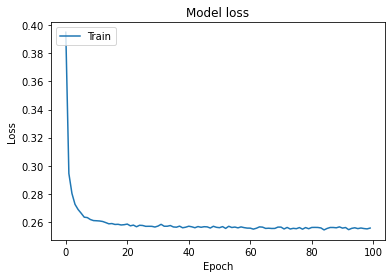

In [62]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

### 결과 : Tensorflow를 이용해 약 89% 정도의 정확도를 얻을 수 있었다.

In [63]:
# 임의의 데이터로 테스트하기

k = np.array(pp[3:4]) # df[3] 은 골키퍼(0)
k = k*-1.01
k2 = np.random.normal(0,1,(1,34)) # 랜덤한 값으로 구성한 데이터
k3 = np.array(pp[7:8]) # df[7] 은 수비수(1)
k3 = k3 * -0.9
k4 = np.array(pp[1:2]) # df[1] 은 공격수(3)
k4 = k4+0.4

print(k)
print()
print(k2)
print()
print(k3)
print()
print(k4)

[[ 1.04706482  1.11565867  0.97847098  0.01815719  1.04706482  1.08136175
   1.04706482  1.0127679   0.12104796  0.46401717  0.01815719 -0.56489046
  -0.80496891 -1.52520425 -0.18762433 -0.53059354 -1.18223504  0.08675104
  -1.18223504  1.08136175  0.32682948  0.8412833   1.11565867 -0.73637507
   1.11565867 -0.83926583  0.56690793  1.08136175  0.87558022 -1.49090733
  -1.66239194 -1.18223504 -1.59379809 -1.55950117]]

[[ 1.08070819  3.37780022  0.21316497 -1.63962135 -1.44771015  0.10055422
  -1.10622397 -1.05014182  0.00969623  0.62353697 -0.28913705 -0.18932009
  -0.79503902  0.62767965 -0.41409541 -0.82070756 -1.21222968 -0.9845293
  -0.21930241  0.26687527  1.86495202 -0.97102207  0.83884292 -0.16844565
   0.92658356  1.48323337 -0.69536339  1.01027646  2.30228296  0.72026936
   0.33772201 -0.21232073  0.19823206  1.51765376]]

[[ 0.39321771  0.42785347 -0.74976228 -0.47267622  0.67030377 -0.19559016
   0.15076741 -0.19559016 -0.57658349 -0.4034047  -0.33413319 -0.50731197
   0.11

In [64]:
b = tf.model.predict(k)

print(b, tf.keras.backend.eval(tf.argmax(b, axis=1)))

[[9.0966516e-08 9.9552959e-01 5.7207362e-04 3.8982450e-03]] [1]


In [65]:
b = tf.model.predict(k2)

print(b, tf.keras.backend.eval(tf.argmax(b, axis=1)))

[[7.818687e-03 9.558872e-01 4.034543e-07 3.629360e-02]] [1]


In [66]:
b = tf.model.predict(k3)

print(b, tf.keras.backend.eval(tf.argmax(b, axis=1)))

[[9.9565339e-01 1.3008711e-04 1.5889273e-05 4.2005531e-03]] [0]


In [67]:
b = tf.model.predict(k4)

print(b, tf.keras.backend.eval(tf.argmax(b, axis=1)))

[[8.3339046e-07 1.9256374e-06 1.1263329e-01 8.8736391e-01]] [3]


### f1 score 측정하기
(numpy로 작업)

In [72]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [144]:
accuracy_score(y_test, pred)

0.8898666666666667

In [145]:
cm = confusion_matrix(y_test, pred)
cm

array([[ 382,    0,    0,    0],
       [   0, 1138,   89,    0],
       [   0,   85, 1268,   93],
       [   0,    2,  144,  549]], dtype=int64)

Text(33.0, 0.5, 'Actual')

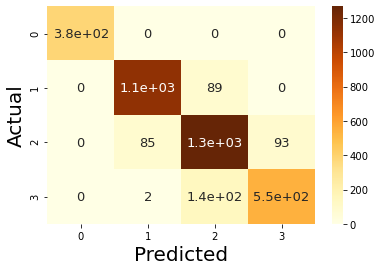

In [76]:
import seaborn as sns

sns.heatmap(cm, annot=True, annot_kws={"size": 13}, cmap='YlOrBr')
plt.xlabel('Predicted', fontsize=20)
plt.ylabel('Actual', fontsize=20)

In [146]:
r = np.array([cm])
result = r.T  # precision을 구하기 위해서 T를 사용한다.
result

array([[[ 382],
        [   0],
        [   0],
        [   0]],

       [[   0],
        [1138],
        [  85],
        [   2]],

       [[   0],
        [  89],
        [1268],
        [ 144]],

       [[   0],
        [   0],
        [  93],
        [ 549]]], dtype=int64)

In [147]:
a_tp  = int(result[0,0])
a_all = int(sum(result[0,:]))
b_tp  = int(result[1,1])
b_all = int(sum(result[1,:]))
c_tp  = int(result[2,2])
c_all = int(sum(result[2,:]))
d_tp  = int(result[3,3])
d_all = int(sum(result[3,:]))

In [148]:
a = a_tp/a_all
b = b_tp/b_all
c = c_tp/c_all
d = d_tp/d_all

precision = (a+b+c+d)/4
precision # precision

0.9072224829959505

In [149]:
a_all2 = int(sum(r[0,0,:]))
b_all2 = int(sum(r[0,1,:]))
c_all2 = int(sum(r[0,2,:]))
d_all2 = int(sum(r[0,3,:]))



In [150]:
a = a_tp/a_all2
b = b_tp/b_all2
c = c_tp/c_all2
d = d_tp/d_all2

recall = (a+b+c+d)/4
recall # recall

0.8985738045726919

In [151]:
f1_score = 2 *(precision*recall)/(precision+recall)
f1_score

0.9028774327996482

### 결론 : f1 score가 1에 매우 가까우므로, 좋은 모델이라고 할 수 있다.